#Final Project

In [233]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import glob
import cv2
import tensorflow as tf

In [186]:
from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [187]:
import os
os.environ['KAGGLE_CONFIG_DIR'] = "/content/gdrive/My Drive/kaggle"
%cd /content/gdrive/My Drive/kaggle

/content/gdrive/My Drive/kaggle


In [188]:
!kaggle datasets download -d kmader/food41

food41.zip: Skipping, found more recently modified local copy (use --force to force download)


In [189]:
tf.random.set_seed(42)
np.random.seed(42)  


### Unzipping the package

In [190]:
!ls
!unzip \*.zip  && rm *.zip

food41.zip		       food_test_c101_n1000_r128x128x1.h5  images
food_c101_n1000_r384x384x3.h5  food_test_c101_n1000_r128x128x3.h5  kaggle.json
food_c101_n10099_r32x32x1.h5   food_test_c101_n1000_r32x32x1.h5    meta
food_c101_n10099_r32x32x3.h5   food_test_c101_n1000_r32x32x3.h5    model.png
food_c101_n10099_r64x64x1.h5   food_test_c101_n1000_r64x64x1.h5
food_c101_n10099_r64x64x3.h5   food_test_c101_n1000_r64x64x3.h5
Archive:  food41.zip
  End-of-central-directory signature not found.  Either this file is not
  a zipfile, or it constitutes one disk of a multi-part archive.  In the
  latter case the central directory and zipfile comment will be found on
  the last disk(s) of this archive.
unzip:  cannot find zipfile directory in one of *.zip or
        *.zip.zip, and cannot find food41.zip.ZIP, period.

No zipfiles found.


### other

In [191]:
food = list(os.walk('/content/gdrive/My Drive/kaggle/images/'))[0][1]
np.random.shuffle(food)
food

['risotto',
 'hot_dog',
 'nachos',
 'omelette',
 'frozen_yogurt',
 'foie_gras',
 'chocolate_mousse',
 'fried_rice',
 'bruschetta',
 'apple_pie',
 'chicken_curry',
 'deviled_eggs',
 'takoyaki',
 'edamame',
 'pork_chop',
 'beef_tartare',
 'steak',
 'poutine',
 'cannoli',
 'donuts',
 'pizza',
 'shrimp_and_grits',
 'crab_cakes',
 'french_toast',
 'pad_thai',
 'ceviche',
 'french_fries',
 'pancakes',
 'breakfast_burrito',
 'tacos',
 'caesar_salad',
 'spaghetti_carbonara',
 'miso_soup',
 'croque_madame',
 'red_velvet_cake',
 'beet_salad',
 'gnocchi',
 'hamburger',
 'escargots',
 'cheese_plate',
 'ramen',
 'eggs_benedict',
 'bibimbap',
 'fried_calamari',
 'panna_cotta',
 'creme_brulee',
 'chicken_quesadilla',
 'strawberry_shortcake',
 'club_sandwich',
 'macaroni_and_cheese',
 'grilled_cheese_sandwich',
 'caprese_salad',
 'clam_chowder',
 'beef_carpaccio',
 'cheesecake',
 'fish_and_chips',
 'bread_pudding',
 'prime_rib',
 'beignets',
 'mussels',
 'falafel',
 'seaweed_salad',
 'huevos_rancheros

In [192]:
value_dict = {x:i for(i, x) in enumerate(food[:round(len(food)/10)])}
value_dict_rev = {i:x for(i, x) in enumerate(food[:round(len(food)/10)])}


for name in value_dict.keys():
  print(value_dict[name])

len(set(value_dict))

value_dict, value_dict_rev

0
1
2
3
4
5
6
7
8
9


({'apple_pie': 9,
  'bruschetta': 8,
  'chocolate_mousse': 6,
  'foie_gras': 5,
  'fried_rice': 7,
  'frozen_yogurt': 4,
  'hot_dog': 1,
  'nachos': 2,
  'omelette': 3,
  'risotto': 0},
 {0: 'risotto',
  1: 'hot_dog',
  2: 'nachos',
  3: 'omelette',
  4: 'frozen_yogurt',
  5: 'foie_gras',
  6: 'chocolate_mousse',
  7: 'fried_rice',
  8: 'bruschetta',
  9: 'apple_pie'})

In [193]:
# data = []
# labels = []

# for name in value_dict.keys():
#     path = '/content/gdrive/My Drive/kaggle/images/'
#     imgs = [cv2.resize(cv2.imread(img), (128, 128), interpolation=cv2.INTER_AREA) for img in glob.glob(path + name + '/*.jpg')]
    
#     for img in imgs:
#         img = img[:,:,::-1]
#         labels.append(value_dict[name])
#         data.append(img)
#         print(value_dict[name])

data = {"path":[], "class":[]}
for name in value_dict.keys():
  path = '/content/gdrive/My Drive/kaggle/images/'
  # print(name)
  for img in glob.glob(path + name + '/*.jpg'):
    # print(img)
    data["path"].append(img)
    data["class"].append(name)

data_df = pd.DataFrame(data, columns= ['path', 'class'])
data_df

,path,class
0,/content/gdrive/My Drive/kaggle/images/risotto...,risotto
1,/content/gdrive/My Drive/kaggle/images/risotto...,risotto
2,/content/gdrive/My Drive/kaggle/images/risotto...,risotto
3,/content/gdrive/My Drive/kaggle/images/risotto...,risotto
4,/content/gdrive/My Drive/kaggle/images/risotto...,risotto
...,...,...
9995,/content/gdrive/My Drive/kaggle/images/apple_p...,apple_pie
9996,/content/gdrive/My Drive/kaggle/images/apple_p...,apple_pie
9997,/content/gdrive/My Drive/kaggle/images/apple_p...,apple_pie
9998,/content/gdrive/My Drive/kaggle/images/apple_p...,apple_pie


In [266]:
data_df_copy = data_df.replace(value_dict)

data_df_copy = data_df_copy.sample(frac = 1, random_state = 42)

data_df_copy

,path,class
6252,/content/gdrive/My Drive/kaggle/images/chocola...,6
4684,/content/gdrive/My Drive/kaggle/images/frozen_...,4
1731,/content/gdrive/My Drive/kaggle/images/hot_dog...,1
4742,/content/gdrive/My Drive/kaggle/images/frozen_...,4
4521,/content/gdrive/My Drive/kaggle/images/frozen_...,4
...,...,...
5734,/content/gdrive/My Drive/kaggle/images/foie_gr...,5
5191,/content/gdrive/My Drive/kaggle/images/foie_gr...,5
5390,/content/gdrive/My Drive/kaggle/images/foie_gr...,5
860,/content/gdrive/My Drive/kaggle/images/risotto...,0


In [267]:
def img_from_path(image_path, label):

  image = tf.io.read_file(image_path)
  image = tf.image.decode_jpeg(image)
  image = image/255
  image = tf.image.convert_image_dtype(image, tf.float32)
  image = tf.image.resize(image, (75,75))
  
  label = tf.one_hot(label, depth = len(value_dict))

  return image, label

In [268]:
def augment_image(image, label):

  image = tf.image.random_flip_left_right(image)
  image = tf.image.random_flip_up_down(image)
  image = tf.image.random_brightness(image, max_delta = 32/255.0)
  image = tf.image.random_saturation(image, lower = 0.5, upper = 1.5)

  return image, label

In [269]:
def data_creator(x, y, batch_size = 32, training=False):

  data = tf.data.Dataset.from_tensor_slices((x,y))
  data = data.map(img_from_path, num_parallel_calls=tf.data.experimental.AUTOTUNE)

  if training: 
    data = data.map(augment_image, num_parallel_calls=tf.data.experimental.AUTOTUNE)

  data = data.shuffle(1000)
  data = data.batch(batch_size)

  data = data.prefetch(tf.data.experimental.AUTOTUNE)

  return data

In [303]:
train, test = train_test_split(data_df_copy, test_size = 0.1, stratify = data_df_copy['class'], random_state = 42)
train, test

(                                                   path  class
 8323  /content/gdrive/My Drive/kaggle/images/brusche...      8
 2239  /content/gdrive/My Drive/kaggle/images/nachos/...      2
 7883  /content/gdrive/My Drive/kaggle/images/fried_r...      7
 9419  /content/gdrive/My Drive/kaggle/images/apple_p...      9
 8425  /content/gdrive/My Drive/kaggle/images/brusche...      8
 ...                                                 ...    ...
 8798  /content/gdrive/My Drive/kaggle/images/brusche...      8
 5016  /content/gdrive/My Drive/kaggle/images/foie_gr...      5
 5043  /content/gdrive/My Drive/kaggle/images/foie_gr...      5
 8684  /content/gdrive/My Drive/kaggle/images/brusche...      8
 9000  /content/gdrive/My Drive/kaggle/images/apple_p...      9
 
 [9000 rows x 2 columns],
                                                    path  class
 3990  /content/gdrive/My Drive/kaggle/images/omelett...      3
 4462  /content/gdrive/My Drive/kaggle/images/frozen_...      4
 3549  /cont

In [304]:
train_dataset = data_creator(train['path'], train['class'], training=True)
test_dataset = data_creator(test['path'], test['class'])

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping i

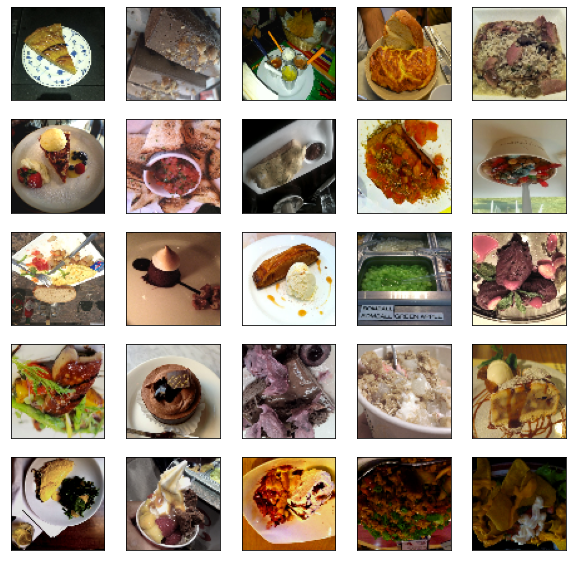

In [305]:
for x, y in train_dataset.take(1):
  
  plt.figure(figsize=(10,10))
  
  for i in range(25):
    plt.subplot(5,5,i+1) 

    plt.xticks([])
    plt.yticks([]) 

    plt.imshow(x[i])

In [306]:
train_dataset, test_dataset

(<PrefetchDataset shapes: ((None, 75, 75, None), (None, 10)), types: (tf.float32, tf.float32)>,
 <PrefetchDataset shapes: ((None, 75, 75, None), (None, 10)), types: (tf.float32, tf.float32)>)

In [307]:
# print(set(data_df['class']))

# data = np.array(data)
# data = data / 255.0
# data = data.astype('float32')

# labels = np.array(labels)

# for i in range(len(set(labels))):
#   print(value_dict_rev[list(set(labels))[i]])

# len(set(labels))


In [308]:
# data, labels, data.shape, labels.shape

In [309]:
# def data_creator(x, y, batch_size = 64): #Creating batches data set
#     data = tf.data.Dataset.from_tensor_slices((x, y))
#     data = data.shuffle(28*28)
#     data = data.batch(batch_size)
#     data = data.prefetch(tf.data.experimental.AUTOTUNE)
#     return data

In [310]:
# train_data = data_creator(x_train, y_train_onehot)
# test_data = data_creator(x_test, y_test_onehot)
# train_data, test_data

In [311]:
# for x, y in train_data.take(1):
  
#   plt.figure(figsize=(10,10))
  
#   for i in range(25):
#     plt.subplot(5,5,i+1)

#     plt.xticks([])
#     plt.yticks([])

#     plt.imshow(x[i]) 

In [312]:
# cnn = tf.keras.models.Sequential([
#                                     tf.keras.layers.Input((64,64,3)),
#                                     tf.keras.layers.Conv2D(32, 1, activation='relu',padding='same'),
#                                     tf.keras.layers.Dense(32, activation='relu'),
#                                     tf.keras.layers.MaxPooling2D(),
#                                     tf.keras.layers.Flatten(),
#                                     tf.keras.layers.Dropout(0.1),
#                                     tf.keras.layers.Dense(9,activation='softmax')
# ])

In [313]:
# cnn.summary()

In [314]:
# tf.keras.utils.plot_model(cnn)

In [315]:
# cnn.compile(optimizer = tf.optimizers.Adam(), loss = tf.losses.CategoricalCrossentropy(), metrics = tf.metrics.CategoricalAccuracy())

In [316]:
# cnn.fit(x_train, y_train_onehot, epochs = 16, validation_data = (x_test, y_test_onehot))

In [317]:
# cnn_df=pd.DataFrame(cnn.history.history)
# cnn_df.plot.line()

In [318]:
pretrained_model = tf.keras.applications.InceptionV3(
    weights='imagenet',
    input_shape=(75, 75, 3),
    include_top=False,
)  

pretrained_model.summary()

Model: "inception_v3"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_25 (InputLayer)           [(None, 75, 75, 3)]  0                                            
__________________________________________________________________________________________________
conv2d_663 (Conv2D)             (None, 37, 37, 32)   864         input_25[0][0]                   
__________________________________________________________________________________________________
batch_normalization_658 (BatchN (None, 37, 37, 32)   96          conv2d_663[0][0]                 
__________________________________________________________________________________________________
activation_658 (Activation)     (None, 37, 37, 32)   0           batch_normalization_658[0][0]    
_______________________________________________________________________________________

In [319]:
len(pretrained_model.layers)


311

In [320]:
for layers in pretrained_model.layers[0:310:2]:
  layers.trainable = False

for layers in pretrained_model.layers[1:310:2]:
  layers.trainable = True

pretrained_model.summary()

Model: "inception_v3"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_25 (InputLayer)           [(None, 75, 75, 3)]  0                                            
__________________________________________________________________________________________________
conv2d_663 (Conv2D)             (None, 37, 37, 32)   864         input_25[0][0]                   
__________________________________________________________________________________________________
batch_normalization_658 (BatchN (None, 37, 37, 32)   96          conv2d_663[0][0]                 
__________________________________________________________________________________________________
activation_658 (Activation)     (None, 37, 37, 32)   0           batch_normalization_658[0][0]    
_______________________________________________________________________________________

In [321]:
model = tf.keras.Sequential([
        pretrained_model,
        tf.keras.layers.Input((None, 2, 2, 2048)),
        tf.keras.layers.Flatten(),
        tf.keras.layers.Dropout(0.2),
        tf.keras.layers.Dense(10,activation='softmax'),
])

# model = tf.keras.Sequential([
#         tf.keras.layers.Input((75, 75, 3)),
#         tf.keras.layers.Conv2D(128, 1, activation='relu',padding='same'),
#         tf.keras.layers.Dense(256, activation='relu',kernel_regularizer=tf.keras.regularizers.l1_l2(l1=1, l2=2)),
#         tf.keras.layers.MaxPooling2D(),
#         tf.keras.layers.Flatten(),
#         tf.keras.layers.Dropout(0.1),
#         tf.keras.layers.Flatten(),
#         tf.keras.layers.Dropout(0.2),
#         tf.keras.layers.Dense(10,activation='softmax'),
# ])




model.summary()

Model: "sequential_17"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
inception_v3 (Functional)    (None, 1, 1, 2048)        21802784  
_________________________________________________________________
input_26 (InputLayer)        multiple                  0         
_________________________________________________________________
flatten_19 (Flatten)         (None, 2048)              0         
_________________________________________________________________
dropout_24 (Dropout)         (None, 2048)              0         
_________________________________________________________________
dense_24 (Dense)             (None, 10)                20490     
Total params: 21,823,274
Trainable params: 10,932,202
Non-trainable params: 10,891,072
_________________________________________________________________


In [322]:
model.compile(optimizer = tf.optimizers.Adam(), loss = tf.losses.CategoricalCrossentropy(), metrics = tf.metrics.CategoricalAccuracy())

In [323]:
model.fit(train_dataset, epochs = 16, validation_data = test_dataset)

Epoch 1/16
282/282 [==============================] - 49s 138ms/step - loss: 2.0488 - categorical_accuracy: 0.3153 - val_loss: 5.2178 - val_categorical_accuracy: 0.2480
Epoch 2/16
282/282 [==============================] - 40s 131ms/step - loss: 1.6231 - categorical_accuracy: 0.4650 - val_loss: 1.9641 - val_categorical_accuracy: 0.4210
Epoch 3/16
282/282 [==============================] - 39s 128ms/step - loss: 1.3742 - categorical_accuracy: 0.5484 - val_loss: 1.6818 - val_categorical_accuracy: 0.4770
Epoch 4/16
282/282 [==============================] - 39s 129ms/step - loss: 1.3085 - categorical_accuracy: 0.5688 - val_loss: 1.4682 - val_categorical_accuracy: 0.5250
Epoch 5/16
282/282 [==============================] - 40s 132ms/step - loss: 1.1340 - categorical_accuracy: 0.6291 - val_loss: 2.3872 - val_categorical_accuracy: 0.4390
Epoch 6/16
282/282 [==============================] - 40s 130ms/step - loss: 0.8859 - categorical_accuracy: 0.7060 - val_loss: 1.7167 - val_categorical_acc

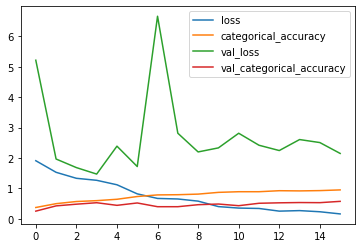

In [324]:
model_df=pd.DataFrame(model.history.history)
model_df.plot.line()

In [325]:
tf.keras.models.save_model(model, '/content/gdrive/MyDrive/Colab Notebooks/final_hamandi.h5')